<a href="https://colab.research.google.com/github/Code-tanisha/UPgrad-Python-Data-science-/blob/main/bank_marketing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bank_marketing_updated_v1.csv to bank_marketing_updated_v1.csv


In [3]:
inp = pd.read_csv('bank_marketing_updated_v1.csv')
inp.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


As we can see from above file the 1st rows are not 2 be used.. the actual data is starting from the 3rd row.

## **DATA CLEANING**

In [4]:
# Now we are going to skip 1st 2 rows

inp = pd.read_csv('bank_marketing_updated_v1.csv', skiprows=2)
inp.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


Now we will remove extra columns

#### **Dropping customer id**

In [5]:
inp.drop("customerid",axis=1,inplace=True)
inp.head()


# Use of inplace= True does not return any new data frame but is simply drops the customerid column in original data frame i.e. inp.

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


**Dividing jobedu into 2 d/f columns job and education**

Also jobedu is string also as shown it is seperated by a comma


In [6]:
# here we will apply a function and split the 2 columns by a comma
inp['job'] = inp.jobedu.apply(lambda x: x.split(",")[0])   # here we are extracting the 0th element from jobedu and assigning to to job column
inp['education'] = inp.jobedu.apply(lambda x: x.split(",")[1])   # here we are extracting the 1st element from jobedu and assigning to to job column
inp.drop("jobedu", axis=1, inplace=True)  # Now we will drop jobedu column
inp.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


we can see that in the month column all the data belongs to year 2017, so there is no point of keeping the year.

**So we will extract only month from the month column.**

In [7]:
inp['month'] = inp.month.apply(lambda x: x.split(",")[0])

AttributeError: ignored

To resolve the error we want to check if the month have some float value or not, or why are getting this error.

In [8]:
# below function will check if x is float or not and where ever it is float we will get as true
inp[inp['month'].apply(lambda x: isinstance(x,float)) == True]

# we can see below we are getting some float values becoz of that i am unable to split 

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


We can see that the above columns which are in float type we have some NANs. which means missing values. so we will now **check for missing values**

In [9]:
inp.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### **Handling missing values**

In [10]:
inp.shape

(45211, 19)

We can see that the total no of records are 45211 and we have 20 missing values in age which is not of much percent of the total records.

Hence we can take risk in removing those records.

In [11]:
inp1 = inp[~inp['age'].isnull()]
inp1.shape

(45191, 19)

In [12]:
inp1['age'].isnull().sum()

0

**Handling missing values in month**

In [13]:
inp1['month'].isnull().sum()

50

Here we can either drop the colomn or impute missing values with some strategy

In [14]:
inp1['month'].value_counts(normalize = True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

as we can see may, jul, aug are the most frequent months

**we will predict the most common values(mode)**

In [15]:
month_mode = inp1['month'].mode()[0]
month_mode

'may, 2017'

In [16]:
# no we will use the above month mode to replace the missing values by method fill na
inp1['month'].fillna(month_mode, inplace = True)


In [17]:
inp1['month'].isnull().sum()

0

#### **Handling missing values in pdays**

In [18]:
inp1['pdays'].describe()

# we can se many values in negative which basically means that the person is not really contacted earlier


count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

**-1 is the missing value in pdays**

1. here we want missing values to be ignored in the calculations

2. how we can do is  we can simply replace the negatives as NaN

In [19]:
# now we are replacing negative values as NaN

inp1.loc[inp1['pdays']<0, 'pdays'] = np.NaN
inp1['pdays'].describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### **OUTLIER HANDLING**

**Age variable**

In [20]:
inp1['age'].describe()

# below we can see that there is not much difference between meadian and min also 25%, 50%, 75% is increeasing slowly to less chances of having outliers

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

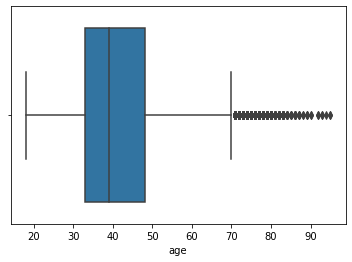

In [21]:
sns.boxplot(inp1['age'])
plt.show()

#you have seen that the age variable has outliers, but these can be treated as the normal values of age because any person can be over 70 or 80 years of age. 
#Also, the 70-90 age group is sparsely populated and participate in opening the term deposit account, which is why these set of people fall out of the box plot but they are not outliers and can be considered as normal values.

**salary variable**

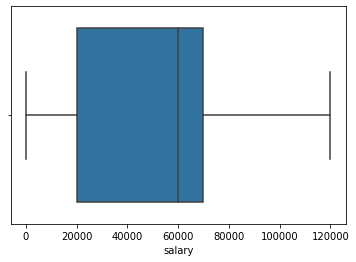

In [22]:
# looking for salary variable

sns.boxplot(inp1['salary'])
plt.show()

**Balance Variable**

In [23]:
inp1['balance'].describe()

# here we can see some unusual values that can be outliers


count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

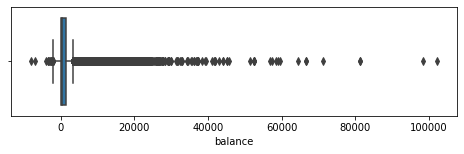

In [24]:
plt.figure(figsize=[8,2])
sns.boxplot(inp1['balance'])
plt.show()

In [25]:
# now ve will check vlues in some quartiles
inp1['balance'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

# now if we want to we can guess that above which quantile are the outliers and we can remove them

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [26]:
# here we will check last 1% of quantile

inp1[inp1.balance >15000].describe()

# here  we can see that there are some unusual salary values it can be or can not be a outlier

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


**Instead of looking for means we will look at quantiles/medians/ percentiles instead**

### **Standardize variable**

In [27]:
inp1['duration'].head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: object

In [28]:
inp1['duration'].describe()

count       45191
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [29]:
# so here we will convert every thing into 1 either in sec or in mins 
# what we are gonna do is, we want to take a value and we want to split based on a space and if it contains sec then we want to divide it by 6 to convert it to minutes otherwise give the value as it is

inp1.duration= inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))


In [30]:
inp1.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [31]:
inp1.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration     float64
campaign       int64
pdays        float64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

## **Univariate Analysis - categorical features**

**marital**

In [32]:
inp1.marital.value_counts()

married     27204
single      12786
divorced     5201
Name: marital, dtype: int64

In [33]:
inp1.marital.value_counts(normalize=True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

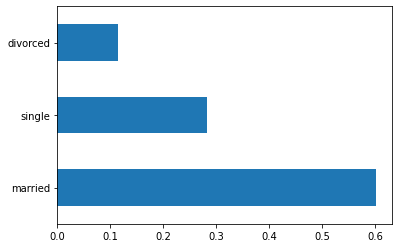

In [34]:
inp1.marital.value_counts(normalize=True).plot.barh()

**Education variable**

In [35]:
inp1['education'].value_counts()

secondary    23193
tertiary     13295
primary       6846
unknown       1857
Name: education, dtype: int64

In [36]:
inp1['education'].value_counts(normalize=True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: education, dtype: float64

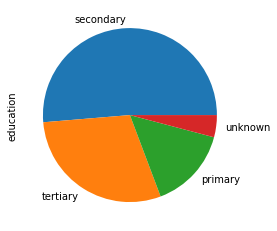

In [37]:
inp1['education'].value_counts(normalize=True).plot.pie()
plt.show()

**poutcome variable**

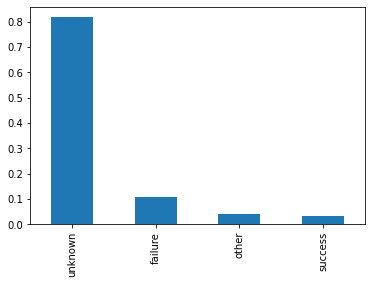

In [38]:
inp1['poutcome'].value_counts(normalize=True).plot.bar()

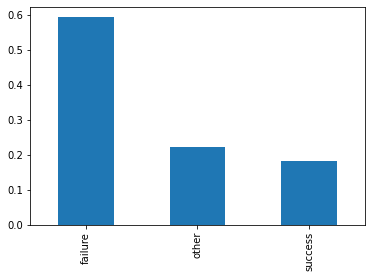

In [39]:
# now we want to see where outcome is not unknown

inp1[~(inp1.poutcome=="unknown")].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

**response the target variable**

In [40]:
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

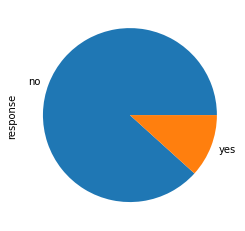

In [41]:
inp1.response.value_counts(normalize=True).plot.pie()

### **Bi-Variate analysis**

**numerical-numerical**

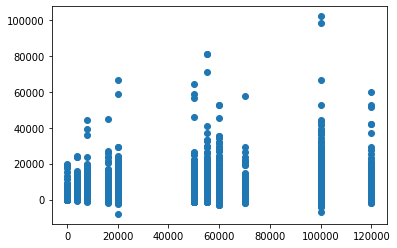

In [42]:
plt.scatter(inp1.salary, inp1.balance)
plt.show()

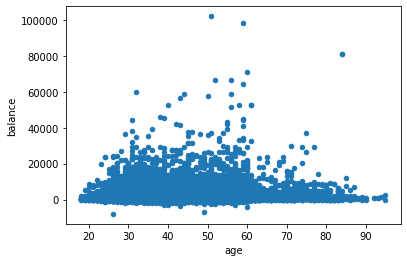

In [43]:
inp1.plot.scatter(x="age", y="balance")

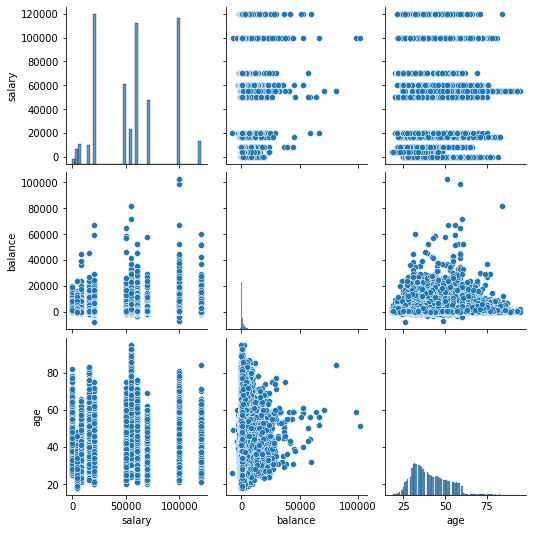

In [44]:
sns.pairplot(data=inp1, vars=["salary", "balance", "age"])

**Quantify using correlation values**

In [45]:
inp1[['age', "salary", "balance"]].corr()

# now we have association between these variales

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


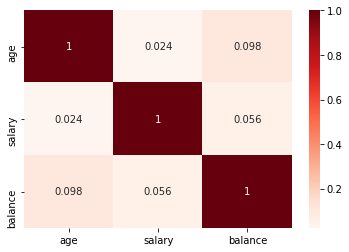

In [46]:
sns.heatmap(inp1[['age','salary','balance']].corr(), annot=True, cmap="Reds")

**Categorical- Numerical**

In [47]:
inp1.groupby("response")["salary"].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [48]:
inp1.groupby("response")["salary"].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

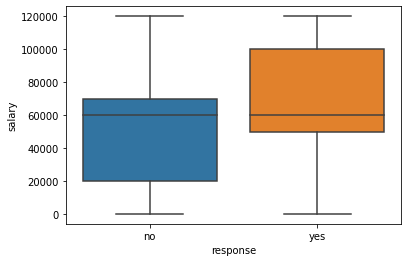

In [49]:
# now we are going to plot a boxplot
sns.boxplot(data=inp1, x="response", y="salary")

# here we can see that the people who responded significantly are hire than the one who did not

#### **Response vs balance**

**We know that balance is highly skewed - has very high values**

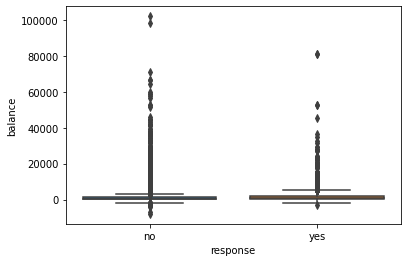

In [50]:
sns.boxplot(data=inp1, x='response', y='balance')

# here as we can see that the view of the boxplot is effected by the outlier

In [51]:
inp1.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [52]:
inp1.groupby('response')['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

**75th Percentile**

In [53]:
def p75(x):
  return np.quantile(x, 0.75)

In [54]:
inp1.groupby('response')['balance'].aggregate(["mean", "median", p75])

,mean,median,p75
response,,,
no,1304.292281,417,1345
yes,1804.681362,733,2159


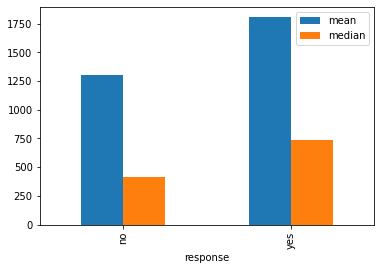

In [55]:
# here we will have mean and median ploted in the same graphi for response and balance
inp1.groupby('response')['balance'].aggregate(["mean", "median"]).plot.bar()
plt.show()

### **Categorical-Categorical**

In [56]:
# now we want a response rate of education
# response is in 0 and 1 so what we wil do 1st is if the response rate is yes we will return a 1, else 1

inp1['response_flag'] = np.where(inp1.response=="yes",1,0)

In [57]:
inp1['response_flag'].value_counts()

0    39906
1     5285
Name: response_flag, dtype: int64

In [58]:
inp1['response'].value_counts()

no     39876
yes     5285
Name: response, dtype: int64

**education vs response_flag**

In [60]:
inp1.groupby(['education'])['response_flag'].mean()

education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

**marital bs response_flag**

In [61]:
inp1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

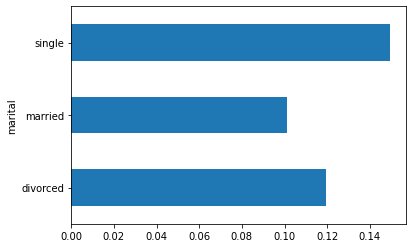

In [63]:
inp1.groupby('marital')['response_flag'].mean().plot.barh()

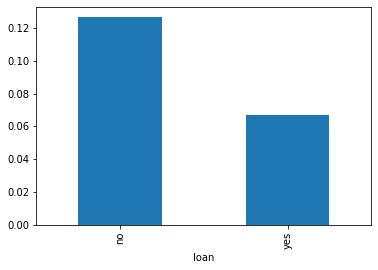

In [65]:
inp1.groupby('loan')['response_flag'].mean().plot.bar()

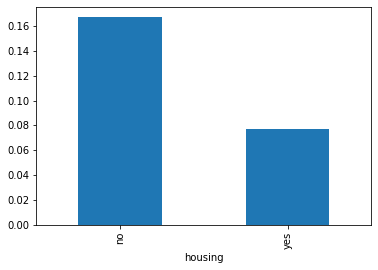

In [66]:
inp1.groupby('housing')['response_flag'].mean().plot.bar()

### **Age vs response**

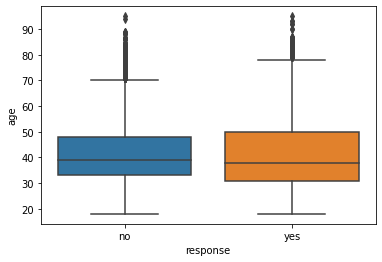

In [69]:
sns.boxplot(data=inp1, x="response", y="age")
plt.show()

# here we can see that there is something going on the upper fence means for both thre are something doing for higher age values

#### **here we will make buckets from the age column(binning)**

In [72]:
# we want buckets of 0-30,30-40,40-50,50-60, 60-give any high value. then we will give labels to these buckets
pd.cut(inp1.age[:5], [0,30,40,50,60,999], labels=["<30", "30-40", "40-50", "50-60", "60+"])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [77]:
inp1['age_group'] = pd.cut(inp1.age[:5], [0,30,40,50,60,999], labels=["<30", "30-40", "40-50", "50-60", "60+"])
inp1['age_group'].value_counts(normalize=True)

40-50    0.4
30-40    0.4
50-60    0.2
60+      0.0
<30      0.0
Name: age_group, dtype: float64

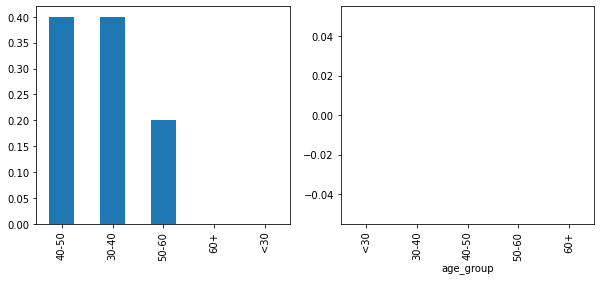

In [81]:
# now here we will plot 2 plots side by side

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1['age_group'].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
inp1.groupby('age_group')['response_flag'].mean().plot.bar()

plt.show()

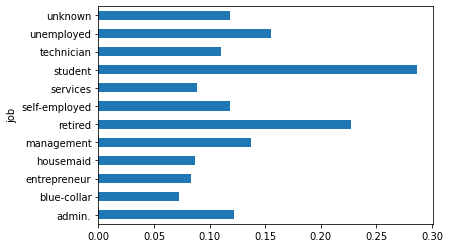

In [83]:
inp1.groupby('job')['response_flag'].mean().plot.barh()

## **MULTIVARIATE Analysis**

**more than 2 variables**

In [86]:
res = pd.pivot_table(data=inp1, index="education", columns="marital", values="response_flag")
res

marital,divorced,married,single
education,,,
primary,0.138667,0.075515,0.106808
secondary,0.103485,0.094595,0.129213
tertiary,0.137415,0.129761,0.183546
unknown,0.142012,0.122414,0.162879


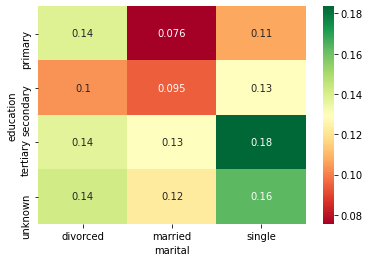

In [89]:
sns.heatmap(res, annot=True, cmap="RdYlGn")

#### **Job vs Marital vs response**

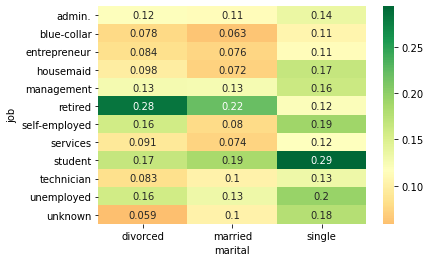

In [93]:
res = pd.pivot_table(data=inp1, index="job", columns="marital", values="response_flag")
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

**education vs poutcome vs response**

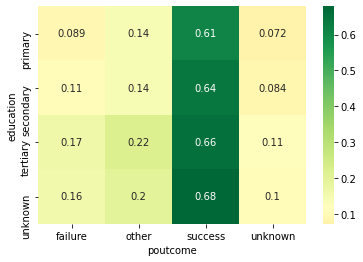

In [94]:
res = pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.117)
plt.show()

In [95]:
# now we want to find the mean of response_flag or rate where pdays>0
inp1[inp1.pdays>0].response_flag.mean()

0.23061076102762967

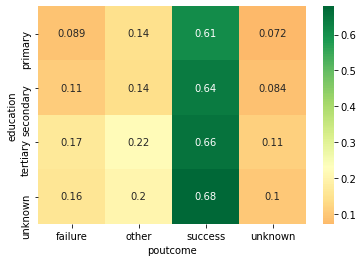

In [96]:
# now we will replace the mean value in the center

res = pd.pivot_table(data=inp1, index="education", columns="poutcome", values="response_flag")
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.2306)
plt.show()